In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util #import libs

import pandas as pd
# import torch
import numpy as np

## Loading the spotify dataset from kaggle to train our model

In [3]:
df_all=pd.read_csv("genres_v2.csv",low_memory=False)

In [4]:
df_all.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [5]:
df_all.shape

(42305, 22)

In [6]:
df_all.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


## Feature Preprocessing

In [7]:
features=df_all[["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness","valence"]]
#the following features are chosen from the dataset as they can come in handy to determine the overall mood of the song.

In [8]:
features.head(10)

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness,valence
0,0.0598,0.831,0.0556,0.814,0.013400,-7.364,0.4200,0.3890
1,0.4010,0.719,0.1180,0.493,0.000000,-7.230,0.0794,0.1240
2,0.0138,0.850,0.3720,0.893,0.000004,-4.783,0.0623,0.0391
3,0.0237,0.476,0.1140,0.781,0.000000,-4.710,0.1030,0.1750
4,0.2170,0.798,0.1660,0.624,0.000000,-7.668,0.2930,0.5910
5,0.0452,0.721,0.1280,0.568,0.212000,-11.295,0.4140,0.1090
6,0.0254,0.718,0.1240,0.668,0.007800,-4.162,0.1370,0.0380
7,0.0397,0.694,0.1120,0.711,0.000000,-5.525,0.2210,0.2830
8,0.0614,0.774,0.0728,0.751,0.000000,-2.445,0.1980,0.1890
9,0.1520,0.893,0.5580,0.907,0.031100,-10.406,0.3670,0.3020


In [9]:
# we see that all the relevant features have a value ranging between 0 to 1 except for loudness.

In [10]:
!pip install scikit-learn
from sklearn import preprocessing 
scaler=preprocessing.MinMaxScaler()


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
loudness=features["loudness"].values
loudness_scaled=scaler.fit_transform(loudness.reshape(-1, 1))

In [12]:
features["loudness"]=loudness_scaled

C:\Users\Siddanth Shetty\AppData\Local\Temp\ipykernel_27876\3116982282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["loudness"]=loudness_scaled


In [13]:
features.head()

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness,valence
0,0.0598,0.831,0.0556,0.814,0.013400,0.712039,0.4200,0.3890
1,0.4010,0.719,0.1180,0.493,0.000000,0.715710,0.0794,0.1240
2,0.0138,0.850,0.3720,0.893,0.000004,0.782742,0.0623,0.0391
3,0.0237,0.476,0.1140,0.781,0.000000,0.784742,0.1030,0.1750
4,0.2170,0.798,0.1660,0.624,0.000000,0.703712,0.2930,0.5910


### Selecting the right K-means model using an elbow plot for the given data

In [14]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
 #let's use elbow method to find out what the optimal k is 
for k in range(1,26):
    model = KMeans(n_clusters=k)
    model = model.fit(features)
    Sum_of_squared_distances.append(model.inertia_)
    print(f'Completed:{k}')

Completed:1
Completed:2
Completed:3
Completed:4
Completed:5
Completed:6
Completed:7
Completed:8
Completed:9
Completed:10
Completed:11
Completed:12
Completed:13
Completed:14
Completed:15
Completed:16
Completed:17
Completed:18
Completed:19
Completed:20
Completed:21
Completed:22
Completed:23
Completed:24
Completed:25


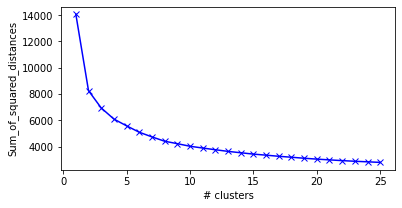

In [15]:
import matplotlib.pyplot as plt #Elbow method
plt.figure(figsize=(6,3))
plt.plot(list(range(1,26)),Sum_of_squared_distances,'bx-')
plt.ylabel('Sum_of_squared_distances')
plt.xlabel('# clusters')
plt.show()

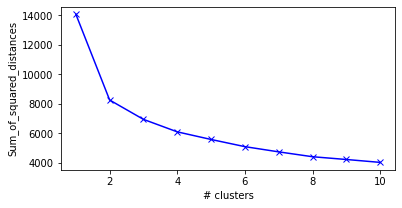

In [16]:
plt.figure(figsize=(6,3))
plt.plot(list(range(1,11)),Sum_of_squared_distances[:10],'bx-')
plt.ylabel('Sum_of_squared_distances')
plt.xlabel('# clusters')
plt.show()

### 4,5 and 6 seem like plausible choices for number of clusters from the elbow plot but since we are recommending songs for 6 emotions in our final model we will go ahead with value of k as 6 to find 6 clusters.

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6)
model = model.fit(features)

In [18]:
predictions=model.predict(features)

for i in range(6):
    print(np.count_nonzero(predictions == i))

8313
9871
9947
2858
7345
3971


In [19]:
df_all['cluster']=predictions
df_all.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title,cluster
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN,3
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN,2
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN,2
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN,0


## Visualising the derived clusters

In [20]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)

In [21]:
pca_result = pca.fit_transform(features)
df=pd.DataFrame(pca_result)
df['cluster']=predictions

C:\Users\Siddanth Shetty\AppData\Local\Temp\ipykernel_27876\1329048935.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


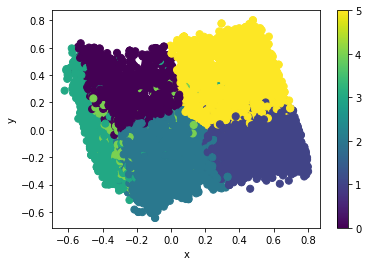

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(df.iloc[:,0].values, df.iloc[:,1].values,c=predictions,s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

fig.show()

## Selecting a Classifier 

#### Let's determine the best classification model to use for future classification. It can be used to classify recommended songs by Spotify or to classify already saved songs into one of the 6 clusters

In [23]:
df_classify=df_all[["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness","valence","cluster"]]

In [24]:
X=df_classify.iloc[:,:-1].values
Y=df_classify.iloc[:,-1].values

### Splitting the dataset into the Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
acc=[]
for i in range(10,30):
  classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')

10:0.923886065476894
11:0.9261316629240043
12:0.9231769294409644
13:0.9275499349958634
14:0.9245952015128236
15:0.9280226923531497
16:0.9281408816924713
17:0.9288500177284009
18:0.9292045857463657
19:0.9293227750856873
20:0.9279045030138282
21:0.9284954497104361
22:0.9274317456565417
23:0.9271953669778986
24:0.9248315801914667
25:0.926486230941969
26:0.9248315801914667
27:0.9253043375487531
28:0.9228223614229997
29:0.9236496867982508


In [27]:
from sklearn.ensemble import RandomForestClassifier
acc=[]
for i in range(90,100):
  classifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')

90:0.9776622148682189
91:0.9777804042075405
92:0.9777804042075405
93:0.977898593546862
94:0.9777804042075405
95:0.9781349722255053
96:0.9780167828861837
97:0.9781349722255053
98:0.9780167828861837
99:0.9775440255288973


In [28]:
from sklearn.naive_bayes import GaussianNB
acc=[]

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))
print(f'{i}:{acc[-1]}')

99:0.9326320765866919


In [29]:
from sklearn.svm import SVC
acc=[]
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  classifier = SVC(kernel = i, random_state = 0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')

linear:0.9885356340858055
poly:0.8774376551235079
rbf:0.9544971043611866
sigmoid:0.2695898829925541


### After trying different classsification algorithms like K-Neighbours, RandomForests, NaiveBayes and SupportVectors, we see that the highest accuracy is acheived by the SVC algorithm with the kernal set to linear.

In [30]:
classifier = SVC(kernel ='linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1666    0    6    5    5    3]
 [   0 1942    1    0    0    0]
 [   8    1 1949    2    4    1]
 [   2    4    1  582    9    0]
 [   8    4   11    0 1435    0]
 [   1   18    3    0    0  790]]


In [31]:
!pip install seaborn 
import seaborn as sns


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


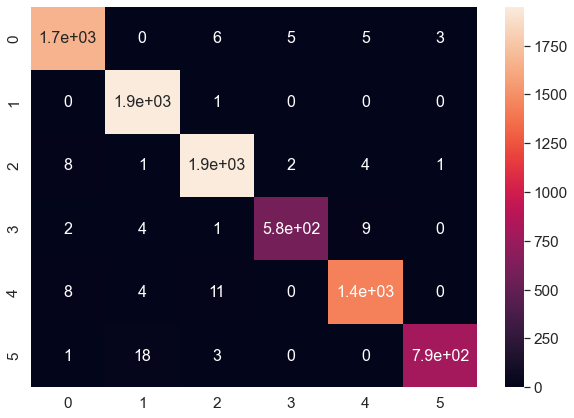

In [32]:
df_cm = pd.DataFrame(cm, range(6), range(6))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

### Cluster's Description

In [33]:
df=df_all[["id","acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness","valence","cluster"]]
cluster_info=[]
for i in range(6):
    cluster_info.append(df[df['cluster']==i].describe().iloc[1,:])
pd.DataFrame(cluster_info)

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness,valence,cluster
mean,0.108638,0.732969,0.206921,0.748098,0.017344,-5.901918,0.205228,0.666600,0.0
mean,0.035047,0.597417,0.219435,0.830581,0.804388,-7.345283,0.068382,0.162038,1.0
mean,0.034803,0.508362,0.286616,0.881803,0.061815,-4.289305,0.135391,0.255966,2.0
mean,0.590669,0.641116,0.160491,0.489000,0.033166,-9.129352,0.170696,0.369531,3.0
mean,0.096017,0.730238,0.153423,0.575148,0.021391,-7.701833,0.172466,0.279580,4.0
mean,0.020007,0.706487,0.184817,0.868119,0.761331,-6.704917,0.074238,0.581845,5.0


#### Cluster 0 has high values of danceability and low values of speechiness and valence and could correspond to songs one might listen to when feeling fear and wants to divert their mind with high tempo songs.
#### Cluster 1 has a low value of valence which correponds to negative emotions in the song and low values of liveliness and danceability as well. Thus it represents songs one might listen to when in a sad mood.
#### Cluster 2 has high values of energy and liveness but low value of valence thus it can correposnd to songs one might listen to when in an angry mood.


#### Cluster 3 has high danceability, liveliness and energy values. It also has a high valence value which depicts a positive uplifiting song. This cluster corresponds to songs one can listen to when happy.
#### Cluster 4 has unusually high loudness and median values for other features. It can include songs one might want to listen to when they wish to be surprised or dont know what to listen to. 
#### Cluster 5 has high values of instrumentalness and low values of speechiness and danceability, this can correpond to neutral emotions.

## Predicting saved songs on spotify 

In [34]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [35]:
cid ='69468bff73c742d0bf85b9bc629452fc' # Client ID
secret = '20e952ce8e6147baba32080968050fc3' # Client Secret
username = 'qtq6p67cm65kvdycpv69ex5rn'

In [36]:
scope = 'user-library-read playlist-modify-public playlist-read-private user-top-read playlist-modify-private user-read-currently-playing'
redirect_uri='https://spotipy.readthedocs.io/en/2.9.0/'
client_credentials_manager = spotipy.oauth2.SpotifyOAuth(scope=scope, username=username,client_id=cid, client_secret=secret, redirect_uri=redirect_uri, cache_path='./tokens.txt') 
#SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [37]:
offset = 0
songs = []
names = []
ids = []
while True:
    content = sp.current_user_saved_tracks(limit=50, offset=offset)
    songs += content['items']
    if content['next'] is not None:
        offset += 100
    else:
        break
for i in songs:
    names.append(i['track']['name'])
    ids.append(i['track']['id'])
index=0
audio_features=[]
while index < len(ids):
    audio_features += sp.audio_features(ids[index:index + 50])
    index += 50
features_list = []
for features in audio_features:
    features_list.append([features['acousticness'], features['danceability'],
                          features['liveness'],features['energy'],
                          features['instrumentalness'], features['loudness'],
                          features['speechiness'], features['valence']])

mydf = pd.DataFrame(features_list, columns=["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness", "valence"],index=ids)


In [38]:
mydf.head()

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness,valence
303ccTay2FiDTZ9fZ2AdBt,0.00105,0.735,0.3820,0.720,0.150000,-7.040,0.3360,0.364
0E0DRHf5PfMeor0ZCwB3oT,0.59000,0.777,0.0669,0.595,0.001390,-6.790,0.0375,0.546
4HbeGjbt7u3pvwDk1vN7P0,0.94000,0.365,0.1090,0.273,0.431000,-16.526,0.0380,0.238
1Ym6aMuT5bliaZMC67AmPp,0.04800,0.449,0.3840,0.534,0.001100,-9.493,0.0494,0.342
5CM4UuQ9Gnd6K2YyKGPMoK,0.62600,0.686,0.3830,0.507,0.000075,-7.097,0.0357,0.690


### Data Preprocessing

In [39]:
loudness=mydf['loudness'].values
loudness_scaled=scaler.fit_transform(loudness.reshape(-1,1))
mydf['loudness']=loudness_scaled
features=mydf.values

### Classification

In [40]:
predictions=classifier.predict(features)
mydf['cluster']=predictions
mydf.head()

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness,valence,cluster
303ccTay2FiDTZ9fZ2AdBt,0.00105,0.735,0.3820,0.720,0.150000,0.749325,0.3360,0.364,2
0E0DRHf5PfMeor0ZCwB3oT,0.59000,0.777,0.0669,0.595,0.001390,0.760038,0.0375,0.546,3
4HbeGjbt7u3pvwDk1vN7P0,0.94000,0.365,0.1090,0.273,0.431000,0.342846,0.0380,0.238,3
1Ym6aMuT5bliaZMC67AmPp,0.04800,0.449,0.3840,0.534,0.001100,0.644213,0.0494,0.342,2
5CM4UuQ9Gnd6K2YyKGPMoK,0.62600,0.686,0.3830,0.507,0.000075,0.746883,0.0357,0.690,3


## Sorting saved songs into playlists for recommendations


In [41]:
emotions = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [42]:
clustered_songs=list(zip(mydf.index,mydf.iloc[:,-1]))

In [43]:
sorted_songs=[[],[],[],[],[],[]]
for i in range(len(clustered_songs)):
    sorted_songs[clustered_songs[i][1]].append(clustered_songs[i][0])

In [44]:
playlists=[]
for i in range(6):
    playlist_created=sp.user_playlist_create(username, name="Cluster "+str(i), public=False,description='')
    #create playlists for a corresponding cluster
    sp.user_playlist_add_tracks(username,playlist_created['id'],sorted_songs[i][:100]) 
    #add new songs
    playlists.append(playlist_created)

In [45]:
playlists[0]['id']

'6yvDfcDh1my9pIXWGYLq2k'

In [46]:
len_clusters=[]
for i in range(5):
    len_clusters.append(len(mydf[mydf['cluster']==i].values))

## Emotion Recogniser

In [47]:
!pip install FER
from fer import Video
from fer import FER
import os
import sys



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
location_videofile = "happy-emotional.gif"

# But the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

In [92]:
processing_data = input_video.analyze(face_detector, display=False)

INFO:fer:10.00 fps, 33 frames, 3.30 seconds
INFO:fer:Making directories at output
INFO:fer:Deleted pre-existing output\happy-emotional_output.gif
  0%|                                                                                       | 0/33 [00:00<?, ?frames/s]

1/1 [==============================] - 0s 87ms/step


  3%|██▍                                                                            | 1/33 [00:00<00:20,  1.57frames/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▊                                                                          | 2/33 [00:01<00:15,  1.96frames/s]

1/1 [==============================] - 0s 20ms/step


  9%|███████▏                                                                       | 3/33 [00:01<00:14,  2.09frames/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                     | 4/33 [00:01<00:13,  2.14frames/s]

1/1 [==============================] - 0s 19ms/step


 15%|███████████▉                                                                   | 5/33 [00:02<00:12,  2.22frames/s]

1/1 [==============================] - 0s 19ms/step


 18%|██████████████▎                                                                | 6/33 [00:02<00:11,  2.27frames/s]

1/1 [==============================] - 0s 21ms/step


 21%|████████████████▊                                                              | 7/33 [00:03<00:11,  2.30frames/s]

1/1 [==============================] - 0s 21ms/step


 24%|███████████████████▏                                                           | 8/33 [00:03<00:10,  2.34frames/s]

1/1 [==============================] - 0s 21ms/step


 27%|█████████████████████▌                                                         | 9/33 [00:04<00:10,  2.34frames/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▋                                                      | 10/33 [00:04<00:09,  2.35frames/s]

1/1 [==============================] - 0s 20ms/step


 33%|██████████████████████████                                                    | 11/33 [00:04<00:09,  2.38frames/s]

1/1 [==============================] - 0s 19ms/step


 36%|████████████████████████████▎                                                 | 12/33 [00:05<00:08,  2.37frames/s]

1/1 [==============================] - 0s 21ms/step


 39%|██████████████████████████████▋                                               | 13/33 [00:05<00:08,  2.35frames/s]

1/1 [==============================] - 0s 24ms/step


 42%|█████████████████████████████████                                             | 14/33 [00:06<00:08,  2.36frames/s]

1/1 [==============================] - 0s 18ms/step


 45%|███████████████████████████████████▍                                          | 15/33 [00:06<00:07,  2.33frames/s]

1/1 [==============================] - 0s 19ms/step


 48%|█████████████████████████████████████▊                                        | 16/33 [00:07<00:07,  2.35frames/s]

1/1 [==============================] - 0s 19ms/step


 52%|████████████████████████████████████████▏                                     | 17/33 [00:07<00:06,  2.41frames/s]

1/1 [==============================] - 0s 20ms/step


 55%|██████████████████████████████████████████▌                                   | 18/33 [00:07<00:06,  2.46frames/s]

1/1 [==============================] - 0s 18ms/step


 58%|████████████████████████████████████████████▉                                 | 19/33 [00:08<00:05,  2.48frames/s]

1/1 [==============================] - 0s 18ms/step


 61%|███████████████████████████████████████████████▎                              | 20/33 [00:08<00:05,  2.50frames/s]

1/1 [==============================] - 0s 20ms/step


 64%|█████████████████████████████████████████████████▋                            | 21/33 [00:08<00:04,  2.52frames/s]

1/1 [==============================] - 0s 23ms/step


 67%|████████████████████████████████████████████████████                          | 22/33 [00:09<00:04,  2.49frames/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████████████████████████████████████████████████████▎                       | 23/33 [00:09<00:04,  2.48frames/s]

1/1 [==============================] - 0s 20ms/step


 73%|████████████████████████████████████████████████████████▋                     | 24/33 [00:10<00:03,  2.34frames/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████████████████████████████████████████████████████████                   | 25/33 [00:10<00:03,  2.37frames/s]

1/1 [==============================] - 0s 18ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 26/33 [00:11<00:02,  2.42frames/s]

1/1 [==============================] - 0s 19ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 27/33 [00:11<00:02,  2.46frames/s]

1/1 [==============================] - 0s 19ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 28/33 [00:11<00:02,  2.47frames/s]

1/1 [==============================] - 0s 17ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 29/33 [00:12<00:01,  2.45frames/s]

1/1 [==============================] - 0s 22ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 30/33 [00:12<00:01,  2.46frames/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 31/33 [00:13<00:00,  2.38frames/s]

1/1 [==============================] - 0s 24ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 32/33 [00:13<00:00,  2.41frames/s]

1/1 [==============================] - 0s 18ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 33/33 [00:13<00:00,  2.37frames/s]
INFO:fer:Completed analysis: saved to output\happy-emotional_output.gif
INFO:fer:Starting to Zip
INFO:fer:Zip has finished


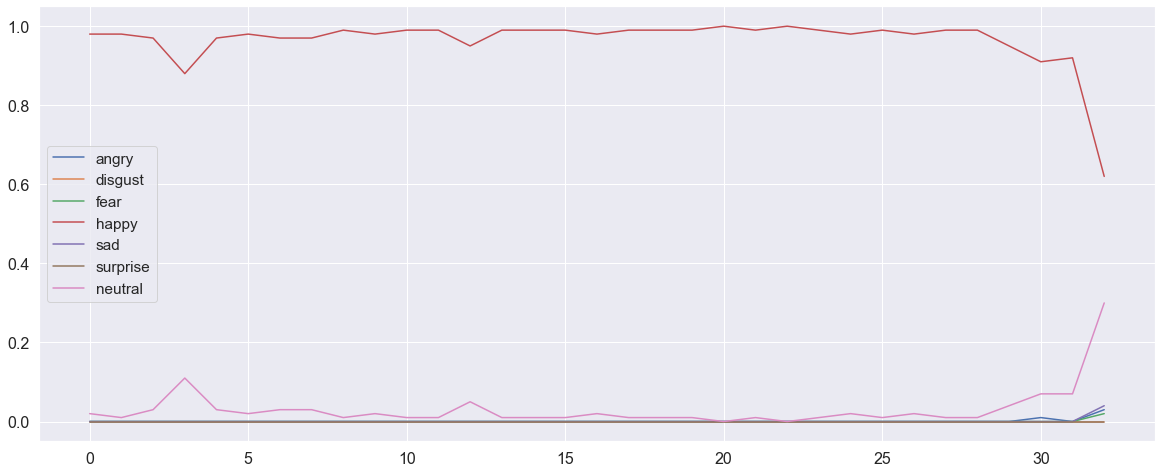

In [93]:
# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

In [94]:
# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

,Human Emotions,Emotion Value from the Video
0,Angry,0.04
1,Fear,0.02
2,Happy,31.83
3,Sad,0.04
4,Surprise,0.00
5,Neutral,1.03


In [95]:
listener_mood=score_comparisons.iloc[score_comparisons['Emotion Value from the Video'].argmax()]['Human Emotions']
listener_mood

'Happy'

In [96]:
mood_clusters={'Fear':0,'Sad':1,'Angry':2,'Happy':3,
               'Surprise':4, 'Neutral':5}
mood_clusters[listener_mood]

3

In [97]:
def show_tracks(tracks):
    for i, item in enumerate(tracks['items']):
        track = item['track']
        print("%d %32.32s %s %s" % (i+1, track['artists'][0]['name'],track['name'],track["uri"])) 
        if(i==9):
            break
        

In [98]:
playlist=sp.playlist(playlists[5-mood_clusters[listener_mood]]['id'])
if playlist['owner']['id'] == username:
    print("You seem to be in a {} mood".format(listener_mood))
    print("Check out some songs from this playlist")
    print(playlist['name'])
    
    results = sp.playlist(playlist['id'],fields="tracks,next")
    tracks = results['tracks']
    show_tracks(tracks)
    while tracks['next']:
        tracks = sp.next(tracks)
        show_tracks(tracks)

You seem to be in a Happy mood
Check out some songs from this playlist
Cluster 2
1                         Stardust Music Sounds Better With You spotify:track:303ccTay2FiDTZ9fZ2AdBt
2                     Lana Del Rey Cherry spotify:track:1Ym6aMuT5bliaZMC67AmPp
3                            Cults Always Forever spotify:track:2enPRFda84VE2wtI8c86Uf
4                             Joji Sanctuary spotify:track:5F1ZmucV0uJY14y2dYKePa
5                        Radiohead No Surprises - Remastered spotify:track:39UJG380DXNHAa07pGdVgI
6                            Darci Cold (feat. CADE) spotify:track:6vW6R25Gp5dbXKShm40gfg
7                             Iyaz Replay spotify:track:294z5BgFzm1nUSjVwbQqFG
8                        SAINt JHN The Best Part of Life spotify:track:0kUz4NuENHYVUChlthlNaB
9                    Calvin Harris Outside (feat. Ellie Goulding) spotify:track:7MmG8p0F9N3C4AXdK6o6Eb
10               Too Close To Touch Miss Your Face spotify:track:7Dy4FIQKMS1sHSgSM435kK
